In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions

In [ ]:
## Loading the data

In [12]:
hr=pd.read_csv("D:/ALL DATASET/HR/train.csv")

In [ ]:
# Problem Statement

## The selceted employess for promotion after particular training and evalation they gpt promotred or not.
    ## conditions
    ## 1 - Promoted
    ## 0- Not promoted

In [ ]:
## Overviw of the data

In [16]:
hr.shape

(54808, 14)

In [13]:
hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
hr["no_of_trainings"].value_counts(normalize=True)

1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
10    0.000091
9     0.000091
8     0.000091
Name: no_of_trainings, dtype: float64

In [ ]:
## missing value identification

In [5]:
hr.isnull().sum()## we found missing value in previous_year_rating  and education variables,will going to fix the same in next step.

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
## missing value imputation

In [17]:
hr["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
hr["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [18]:
hr["education"].fillna(hr["education"].value_counts().idxmax(),inplace=True)## imputing the missing value with mode value

In [19]:
hr["previous_year_rating"].fillna(hr["previous_year_rating"].value_counts().idxmax(),inplace=True)## imputing the missing value with mode value

In [20]:
hr.isnull().sum() ## checking missing value again

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [21]:
hr["previous_year_rating"].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [22]:
hr["education"].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [23]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [24]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [25]:
hr["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [26]:
hr.drop("employee_id",axis=1,inplace=True)

In [17]:
hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
## Visualization

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

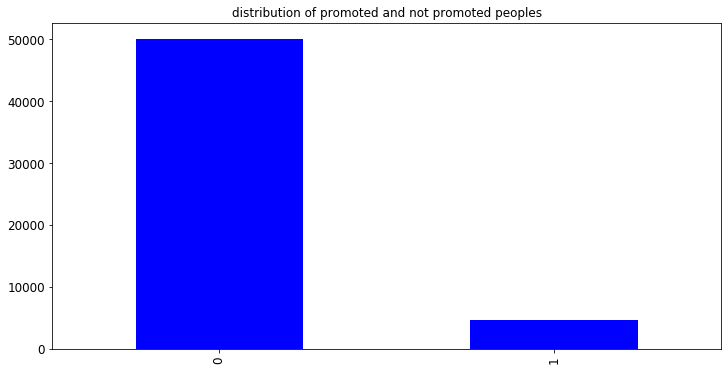

In [18]:
hr["is_promoted"].value_counts().sort_index().plot.bar(color="blue",
                                                    fontsize=12,
                                                    figsize=(12,6),
                                                    title="distribution of promoted and not promoted peoples")
hr.is_promoted.value_counts(normalize=True)*100

## Those who are not promoted thiere rate is very high.
## Those who are get promoted thiere rate is very less

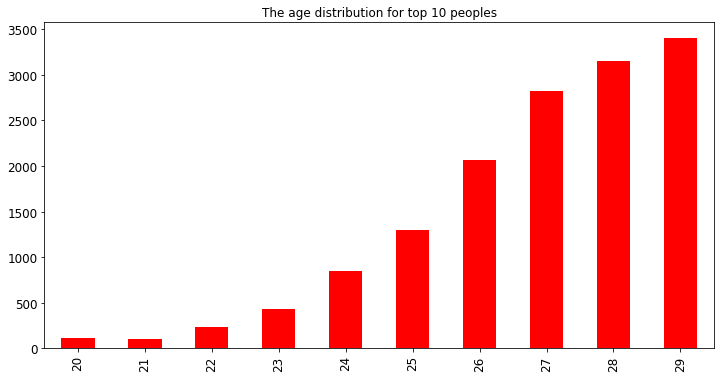

In [40]:
hr["age"].value_counts().sort_index().head(10).plot.bar(color="red",
                                                       fontsize=12,
                                                       title="The age distribution for top 10 peoples",
                                                       figsize=(12,6))
## Age rate is keep on increasing.

Bachelor's          71.299810
Master's & above    27.231426
Below Secondary      1.468764
Name: education, dtype: float64

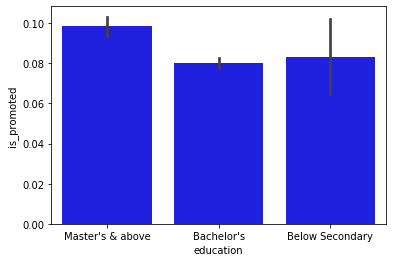

In [51]:
sns.barplot(x="education",y="is_promoted",data=hr,color="blue")
hr.education.value_counts(normalize=True)*100
## The peoples those who are studied Bachelor's degree thiere percentage is more in terms of education.

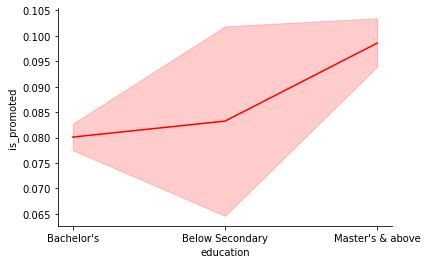

In [61]:
sns.lineplot(x="education",y="is_promoted",data=hr,color="red")
sns.despine()
## The peoples those who are studied Bachelor's degree thiere promotion rate is less compared to other degree holders.

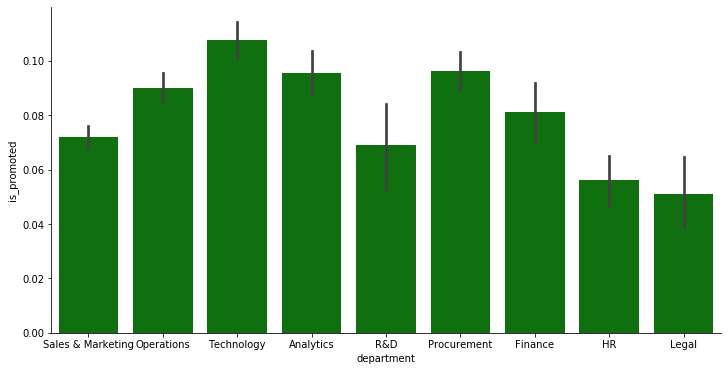

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x="department",y="is_promoted",data=hr,color="green")
sns.despine()
## The technology department rates high in terms of promotion.

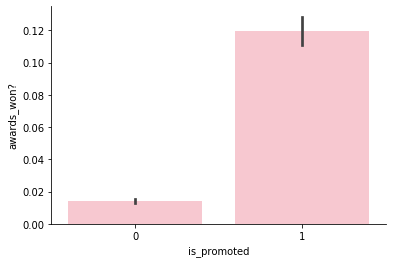

In [23]:
sns.barplot(x="is_promoted",y='awards_won?',data=hr,color="pink")
sns.despine()
## Those who are promoted they got more awards

In [25]:
hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

m    70.237921
f    29.762079
Name: gender, dtype: float64

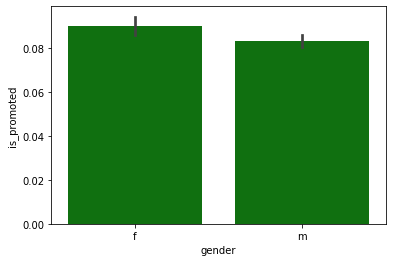

In [19]:
sns.barplot(x="gender",y="is_promoted",data=hr,color="green")
hr.gender.value_counts(normalize=True)*1e2
## females are get more promoted then males.

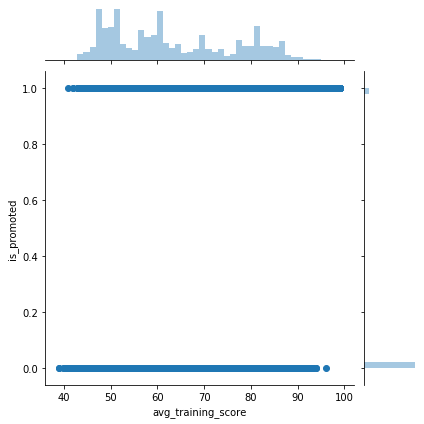

In [36]:
sns.jointplot(x="avg_training_score",y="is_promoted",data=hr)


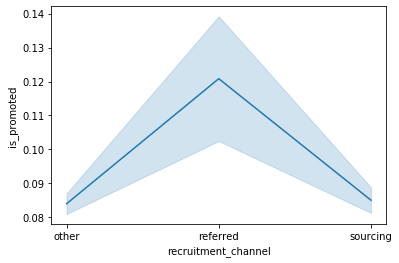

In [39]:
sns.lineplot(x="recruitment_channel",
            y="is_promoted",
            data=hr)
## the promtion in terms of reffered peoples is high

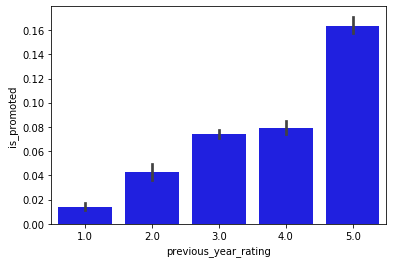

In [32]:
sns.barplot(x="previous_year_rating",
           y="is_promoted",
           data=hr,
           color="blue")
## those who got higher rating they are promoted more.

In [41]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [42]:
hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [53]:
num_col=hr.loc[:,('no_of_trainings', 'age','length_of_service','avg_training_score','is_promoted')]

In [55]:
hr["avg_training_score"].value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

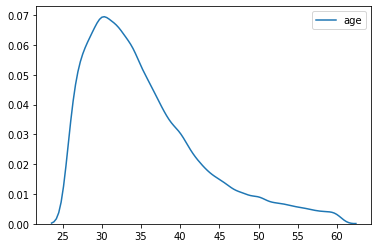

In [57]:
sns.kdeplot(hr.query("age>25").age)

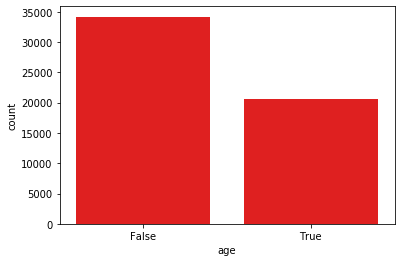

In [58]:
sns.countplot(hr["age"]>35,color="red")

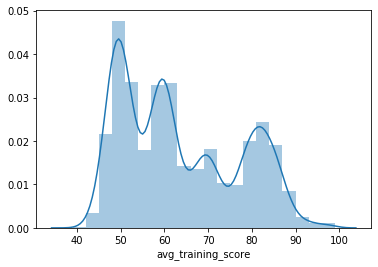

In [61]:
sns.distplot(hr["avg_training_score"],bins=20,kde=True)
## Most of the members got average trainng score is 50

In [66]:
df=hr[hr.age.isin(hr.age.value_counts().head().index)]

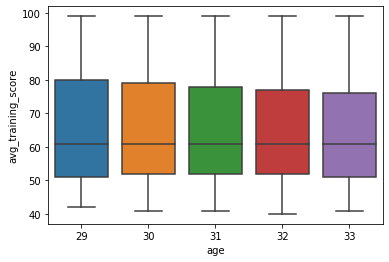

In [68]:
sns.boxplot(x="age",
           y="avg_training_score",
           data=df)

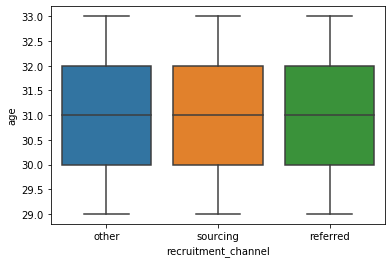

In [69]:
sns.boxplot(x="recruitment_channel",
           y="age",data=df)

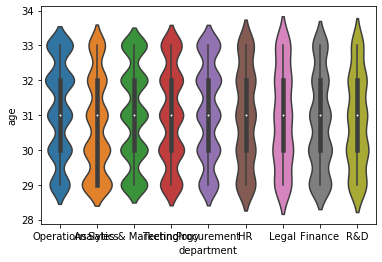

In [71]:
sns.violinplot(x="department",
              y="age",
              data=df)

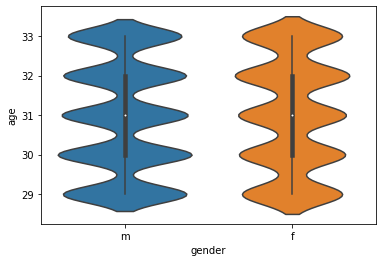

In [73]:
sns.violinplot(x="gender",
              y="age",
              data=df)

In [ ]:
## correlation plot

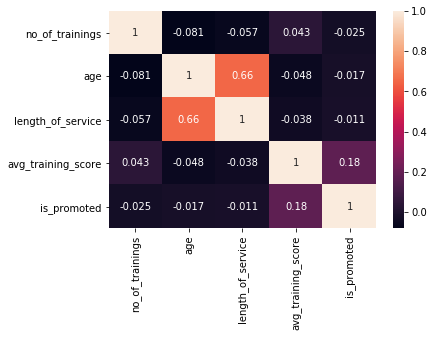

In [74]:
sns.heatmap(num_col.corr(),annot=True)
## avg training score var is good correlation with is_promoted varibale

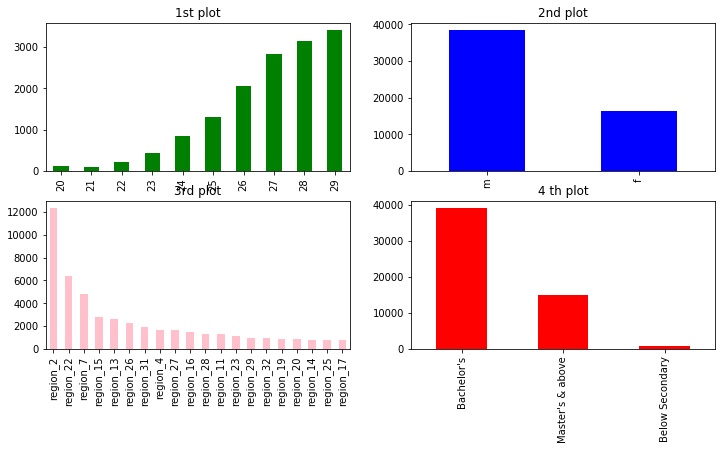

In [88]:
fig,axarr=plt.subplots(2,2,figsize=(12,6))
hr["age"].value_counts().sort_index().head(10).plot.bar(ax=axarr[0,0],color="green",title="1st plot")
hr["gender"].value_counts().plot.bar(ax=axarr[0,1],color="blue",title="2nd plot")
hr["region"].value_counts().head(20).plot.bar(ax=axarr[1,0],color="pink",title="3rd plot")
hr["education"].value_counts().head(20).plot.bar(ax=axarr[1,1],color="red",title="4 th plot")


In [19]:
hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

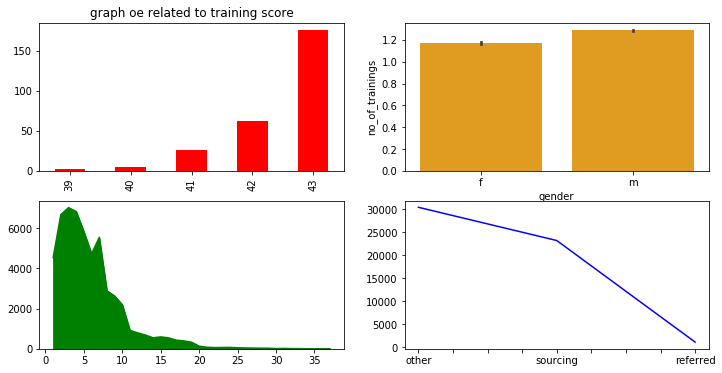

In [33]:
plt.figure(figsize=(20,20))
fig,axarr=plt.subplots(2,2,figsize=(12,6))
hr['avg_training_score'].value_counts().sort_index().head().plot.bar(ax=axarr[0,0],color="red",title="graph oe related to training score")
sns.barplot(x="gender",y="no_of_trainings",data=hr,color="orange",ax=axarr[0,1])
hr["length_of_service"].value_counts().sort_index().plot.area(ax=axarr[1,0],color="green",fontsize=10)
hr["recruitment_channel"].value_counts().plot.line(ax=axarr[1,1],color="blue",fontsize=10)

In [35]:
data_new=hr.loc[:,('age','avg_training_score','previous_year_rating','is_promoted')]
## The peoples in the age range of 30 to 45 they got good rating as well as promotion also.
## Higher the training_score higher the rate of promotion.


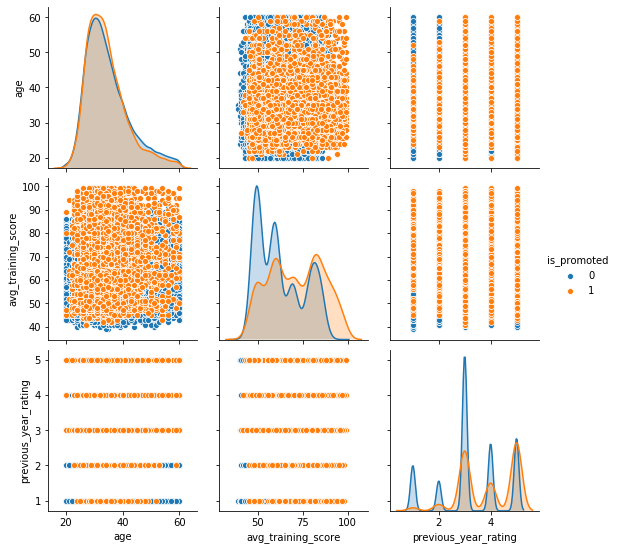

In [37]:
sns.pairplot(data_new,hue='is_promoted')

In [39]:
hr.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [41]:
hr["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

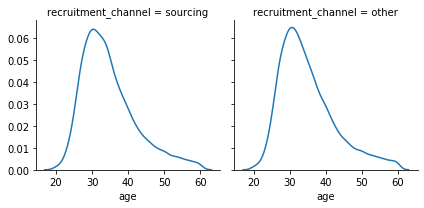

In [44]:
df_facet=hr[hr["recruitment_channel"].isin(["other","sourcing"])]
p=sns.FacetGrid(df_facet,col="recruitment_channel")
p.map(sns.kdeplot,"age")

# Key pionts from EDA

In [ ]:
1.Those who are not prooted thiere rate is very high compared to the promoted guys.
2.The peoples those who are working in a company thiere age starting from 20.
3.The peoples those who are studied Bachelor's degree thiere percentage is more in terms of education.
4.The technology department rates high in terms of promotion.
5.Those who are promoted they got more awards and reconization.
6.females are get more promoted then males.
7.The promtion in terms of reffered peoples is high.
8.Higher the rating hgher is the promotion rate.
9.Most of the members got average trainng score is 50.
10.Avg training score var is having good correlation with is_promoted varibale.
11.The peoples in the age range of 30 to 45 they got good rating as well as promotion also.
12.Higher the training_score higher the rate of promotion.


In [ ]:
## Coverting all catagorial variables into numerical variable by using pd.get dummies

In [16]:
cat_col=hr.loc[:,('department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings','awards_won?')]

In [17]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [27]:
hr=pd.get_dummies(hr,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings','awards_won?'])

In [19]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           54808 non-null  int64  
 1   previous_year_rating          54808 non-null  float64
 2   length_of_service             54808 non-null  int64  
 3   KPIs_met >80%                 54808 non-null  int64  
 4   avg_training_score            54808 non-null  int64  
 5   is_promoted                   54808 non-null  int64  
 6   department_Analytics          54808 non-null  uint8  
 7   department_Finance            54808 non-null  uint8  
 8   department_HR                 54808 non-null  uint8  
 9   department_Legal              54808 non-null  uint8  
 10  department_Operations         54808 non-null  uint8  
 11  department_Procurement        54808 non-null  uint8  
 12  department_R&D                54808 non-null  uint8  
 13  d

In [15]:
hr.head(2)

,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10,awards_won?_0,awards_won?_1
0,35,5.0,8,1,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,30,5.0,4,0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
### scaling 

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc_x=StandardScaler()

In [30]:
hr.columns

Index(['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'reg

In [31]:
x=pd.DataFrame(sc_x.fit_transform(hr.drop(["is_promoted"],axis=1),),
              columns=['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'avg_training_score', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', "education_Bachelor's", 'education_Below Secondary',
       "education_Master's & above", 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'no_of_trainings_1',
       'no_of_trainings_2', 'no_of_trainings_3', 'no_of_trainings_4',
       'no_of_trainings_5', 'no_of_trainings_6', 'no_of_trainings_7',
       'no_of_trainings_8', 'no_of_trainings_9', 'no_of_trainings_10',
       'awards_won?_0', 'awards_won?_1'])

In [32]:
y=hr["is_promoted"]

In [33]:
x.head()

,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10,awards_won?_0,awards_won?_1
0,0.025598,1.395766,0.500460,1.356878,-1.075931,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.183001,-0.092803,-0.048383,-0.028345,-0.014798,-0.009552,-0.009552,-0.009552,0.154018,-0.154018
1,-0.627135,1.395766,-0.437395,-0.736986,-0.253282,-0.328964,-0.220262,-0.214834,-0.139009,1.956975,...,-0.183001,-0.092803,-0.048383,-0.028345,-0.014798,-0.009552,-0.009552,-0.009552,0.154018,-0.154018
2,-0.104948,-0.250651,0.265996,-0.736986,-1.001145,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.183001,-0.092803,-0.048383,-0.028345,-0.014798,-0.009552,-0.009552,-0.009552,0.154018,-0.154018
3,0.547785,-1.897069,0.969387,-0.736986,-1.001145,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.183001,-0.092803,-0.048383,-0.028345,-0.014798,-0.009552,-0.009552,-0.009552,0.154018,-0.154018
4,1.331064,-0.250651,-0.906322,-0.736986,0.718939,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.183001,-0.092803,-0.048383,-0.028345,-0.014798,-0.009552,-0.009552,-0.009552,0.154018,-0.154018


In [ ]:
## spiltting data into test and train

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [37]:
x_train.shape

(38365, 68)

In [38]:
y_train.shape

(38365,)

In [39]:
y_test.shape

(16443,)

In [40]:
x_test.shape

(16443, 68)

# Algo-1,

### KNN clasifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
train_score=[]## Passing test score and train score to fit the model
test_score=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)

In [43]:
train_score.append(knn.score(x_train,y_train))
test_score.append(knn.score(x_test,y_test))

In [ ]:
### identifying k value

In [44]:
max_train_score=max(train_score)
train_score_ind=[i for i,v in enumerate(train_score) if v==max_train_score]
print("max train score {} % and k={}".format(max_train_score*100,list(map(lambda x: x+1,train_score_ind))))

max train score 91.7998175420305 % and k=[1]


In [45]:
max_test_score=max(test_score)
test_score_ind=[i for i,v in enumerate(test_score) if v==max_test_score]
print("max test score % {} and k={}".format(max_test_score*100,list(map(lambda x: x+1,test_score_ind))))

max test score % 91.7290032232561 and k=[1]


# KNN MODEL

In [46]:
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
## predict

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_pred=knn.predict(x_test)

In [49]:
knn.score(x_test,y_test)

0.883050538222952

In [77]:
confusion_matrix(y_test,y_pred)

array([[14193,   850],
       [ 1073,   327]], dtype=int64)

In [78]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,14193,850,15043
1,1073,327,1400
All,15266,1177,16443


In [ ]:
 Accuracy = 88.30%%

In [79]:
from sklearn import metrics

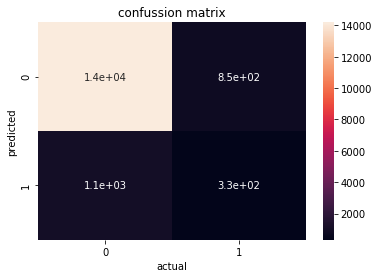

In [81]:
cnf_knn=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_knn),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("confussion matrix")
plt.show()

In [ ]:
## Classification report

In [50]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.94     15043\n           1       0.28      0.23      0.25      1400\n\n    accuracy                           0.88     16443\n   macro avg       0.60      0.59      0.60     16443\nweighted avg       0.87      0.88      0.88     16443\n'

In [ ]:
## Roc Curve

In [82]:
from sklearn.metrics import roc_curve

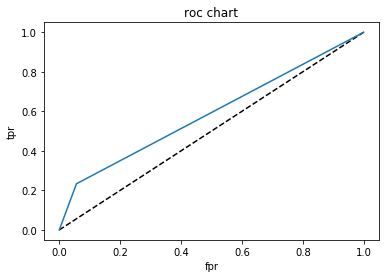

In [83]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="knn")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc chart")
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.5885333710031244

###  Algo-2
###  Naïve bayes algorithem

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
## predict

In [54]:
x_train.shape

(38365, 68)

In [55]:
y_train.shape

(38365,)

In [56]:
x_test.shape

(16443, 68)

In [57]:
y_test.shape

(16443,)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
y_gnb_pred=gnb.predict(x_test)

In [60]:
gnb.score(x_test,y_test)

0.13939062214924283

In [61]:
confusion_matrix(y_test,y_gnb_pred)

array([[  927, 14116],
       [   35,  1365]], dtype=int64)

In [62]:
pd.crosstab(y_test,y_gnb_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,927,14116,15043
1,35,1365,1400
All,962,15481,16443


In [ ]:
13.93%%%

In [ ]:
## classification report

In [111]:
print(classification_report(y_test,y_gnb_pred))

              precision    recall  f1-score   support

           0       0.96      0.06      0.12     15043
           1       0.09      0.97      0.16      1400

    accuracy                           0.14     16443
   macro avg       0.53      0.52      0.14     16443
weighted avg       0.89      0.14      0.12     16443



In [110]:
y_gnb_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
### Roc Curve

In [114]:
from sklearn.metrics import roc_curve

In [117]:
y_gnb_prob=pd.DataFrame(y_gnb_prob,columns=["prob"])

In [118]:
y_gnb_prob.describe()

,prob
count,16443.000000
mean,0.941362
std,0.231100
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [119]:
y_gnb_prob.prob.value_counts()

1.000000e+00    12924
1.000000e+00      173
1.000000e+00      147
1.000000e+00       81
1.000000e+00       46
                ...  
9.866454e-01        1
1.000000e+00        1
9.170657e-01        1
7.701798e-73        1
9.822051e-03        1
Name: prob, Length: 2608, dtype: int64

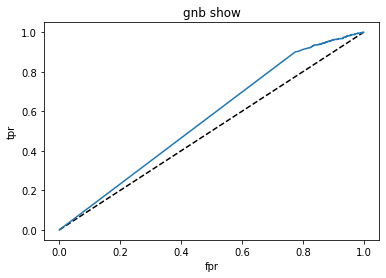

In [115]:
y_gnb_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_gnb_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="gnb")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("gnb show")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_test,y_gnb_prob)

0.563289237519112

# Algo-3
### dec tree algorithem

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
tree=DecisionTreeClassifier(max_depth=10,random_state=0,criterion='gini')
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
## predict

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
y_tree_pred=tree.predict(x_test)

In [68]:
tree.score(x_test,y_test)

0.9003831417624522

In [ ]:
## confussion matrix

In [69]:
confusion_matrix(y_test,y_tree_pred)

array([[14177,   866],
       [  772,   628]], dtype=int64)

In [70]:
pd.crosstab(y_test,y_tree_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,14177,866,15043
1,772,628,1400
All,14949,1494,16443


In [ ]:
Accuracy - 89.77%

In [ ]:
## confussion matrix

In [71]:
from sklearn import metrics

In [72]:
cnf_graph=metrics.confusion_matrix(y_test,y_tree_pred)

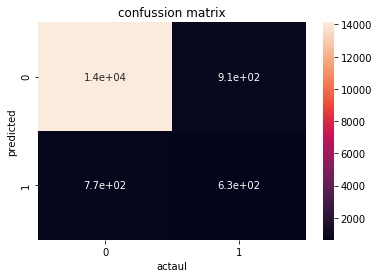

In [67]:
sns.heatmap(pd.DataFrame(cnf_graph),annot=True)
plt.xlabel("actaul")
plt.ylabel("predicted")
plt.title("confussion matrix")
plt.show()

In [ ]:
## classification report

In [73]:
classification_report(y_test,y_tree_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95     15043\n           1       0.42      0.45      0.43      1400\n\n    accuracy                           0.90     16443\n   macro avg       0.68      0.70      0.69     16443\nweighted avg       0.90      0.90      0.90     16443\n'

In [ ]:
## roc curve

In [68]:
from sklearn.metrics import roc_curve

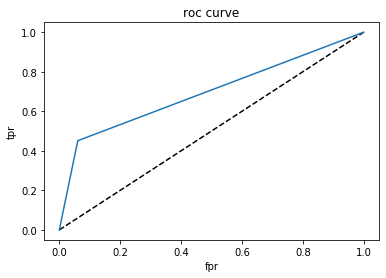

In [69]:
y_tree_prob=tree.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_tree_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="tree")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc curve")
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_tree_prob)

0.6952914977065746

# Algo-4
### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
## predict

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
y_rf_pred=rf.predict(x_test)

In [78]:
rf.score(x_test,y_test)

0.9351699811469927

In [ ]:
### confussion matrix

In [79]:
confusion_matrix(y_test,y_rf_pred)

array([[14959,    84],
       [  982,   418]], dtype=int64)

In [80]:
pd.crosstab(y_test,y_rf_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,14959,84,15043
1,982,418,1400
All,15941,502,16443


In [ ]:
Accuracy is = 93.44%

In [79]:
from sklearn import metrics

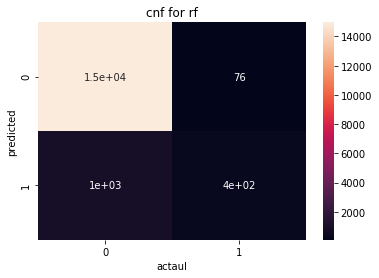

In [81]:
cnf_rf=metrics.confusion_matrix(y_test,y_rf_pred)
sns.heatmap(pd.DataFrame(cnf_rf),annot=True)
plt.xlabel("actaul")
plt.ylabel("predicted")
plt.title("cnf for rf")
plt.show()

In [ ]:
## Classification report

In [81]:
classification_report(y_test,y_rf_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.97     15043\n           1       0.83      0.30      0.44      1400\n\n    accuracy                           0.94     16443\n   macro avg       0.89      0.65      0.70     16443\nweighted avg       0.93      0.94      0.92     16443\n'

In [ ]:
## roc curve

In [82]:
from sklearn.metrics import roc_curve

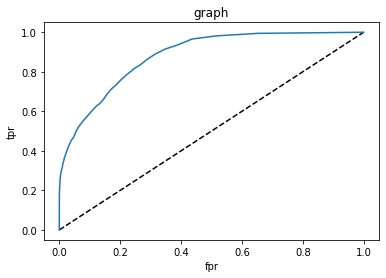

In [84]:
y_rf_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_rf_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="rf")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("graph")
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_rf_prob)

0.8803511600079771

#  Algo-5
## logistic regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lm=LogisticRegression()

In [84]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## predict

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
y_lm_pred=lm.predict(x_test)

In [87]:
lm.score(x_test,y_test)

0.9320075412029435

In [ ]:
93.20%%

In [ ]:
## confusion matrix

In [48]:
confusion_matrix(y_test,y_lm_pred)

array([[14946,    97],
       [ 1021,   379]], dtype=int64)

In [49]:
pd.crosstab(y_test,y_lm_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,14946,97,15043
1,1021,379,1400
All,15967,476,16443


In [ ]:
Accuaracy=93.20%%

In [50]:
from sklearn import metrics

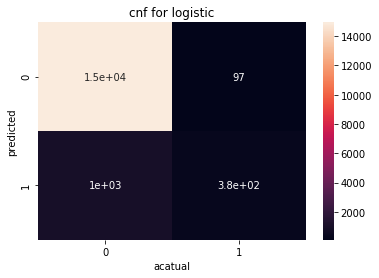

In [51]:
lm_cn=metrics.confusion_matrix(y_test,y_lm_pred)
sns.heatmap(pd.DataFrame(lm_cn),annot=True)
plt.xlabel("acatual")
plt.ylabel("predicted")
plt.title("cnf for logistic")
plt.show()

In [ ]:
## classification report

In [88]:
classification_report(y_test,y_lm_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96     15043\n           1       0.80      0.27      0.40      1400\n\n    accuracy                           0.93     16443\n   macro avg       0.87      0.63      0.68     16443\nweighted avg       0.92      0.93      0.92     16443\n'

In [ ]:
## roc curve

In [52]:
from sklearn.metrics import roc_curve

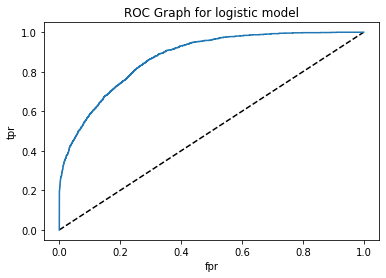

In [56]:
y_lm_prob=lm.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lm_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="lm")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Graph for logistic model")
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_lm_prob)

0.8726443481068556

# Algo-6

### XGboost

In [89]:
import xgboost as xgb


In [90]:
xgb_model=xgb.XGBClassifier(n_estimators=100,
                           random_state=0,
                           max_depth=12)

In [91]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
### xgb predict

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
y_xgb_pred=xgb_model.predict(x_test)

In [94]:
xgb_model.score(x_test,y_test)

0.936325488049626

In [95]:
confusion_matrix(y_test,y_xgb_pred)

array([[14861,   182],
       [  865,   535]], dtype=int64)

In [96]:
pd.crosstab(y_test,y_xgb_pred,margins=True)

col_0,0,1,All
is_promoted,,,
0,14861,182,15043
1,865,535,1400
All,15726,717,16443


In [ ]:
## Accuracy of xgboost model is 93.63%% without paramaetrs tuning

In [ ]:
## classification report

In [97]:
classification_report(y_test,y_xgb_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.97     15043\n           1       0.75      0.38      0.51      1400\n\n    accuracy                           0.94     16443\n   macro avg       0.85      0.69      0.74     16443\nweighted avg       0.93      0.94      0.93     16443\n'

In [ ]:
## confussion matrix 

In [28]:
from sklearn import metrics

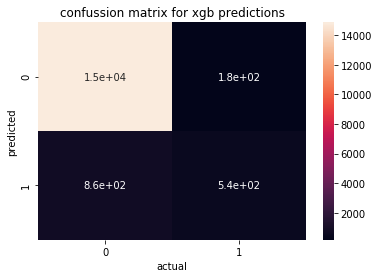

In [32]:
cnf_xgb=metrics.confusion_matrix(y_test,y_xgb_pred)
sns.heatmap(pd.DataFrame(cnf_xgb),annot=True)
plt.title("confussion matrix for xgb predictions")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [ ]:
## Roc curve for xgb model

In [33]:
from sklearn.metrics import roc_curve

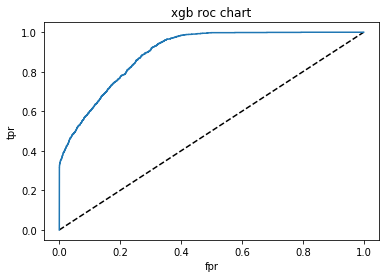

In [39]:
y_xgb_prob=xgb_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_xgb_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="xgb")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("xgb roc chart")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_xgb_prob)

0.8965689309693166

In [ ]:
## Roc score for xgboost model is 89.65%%

In [ ]:
## Making ROC and Acuracy chart with respect diffrent algo's.

In [105]:
data=[[93.20,87.20,"Logistic regression"],[93.44,88.035,"Random Forest"],
      [89.77,69.52,"Dec Tree"],[13.93,56.32,"Naïve bayes"],[88.30,58.85,"KNN"],[93.63,89.65,"XG BOOST"]]

In [106]:
df=pd.DataFrame(data,columns=["Acuracy","ROC Score","Algorithems type"])

In [107]:
df

,Acuracy,ROC Score,Algorithems type
0,93.20,87.200,Logistic regression
1,93.44,88.035,Random Forest
2,89.77,69.520,Dec Tree
3,13.93,56.320,Naïve bayes
4,88.30,58.850,KNN
5,93.63,89.650,XG BOOST


# Conclussion

In [ ]:
## From the above chart what we can say is XG boost algorithem is giving beter accuaracy as well better ROC score compared to all other
algorithems.
## So for i can say XG boost is giving a better model compared to all other algo's.

# Unsupervised Learning.
## KMEANS

In [99]:
from sklearn.cluster import KMeans

In [100]:
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,init="k-means++",random_state=38)
     kmeans.fit(x)
wcss.append(kmeans.inertia_)



In [101]:
wcss

[3105568.127463357]

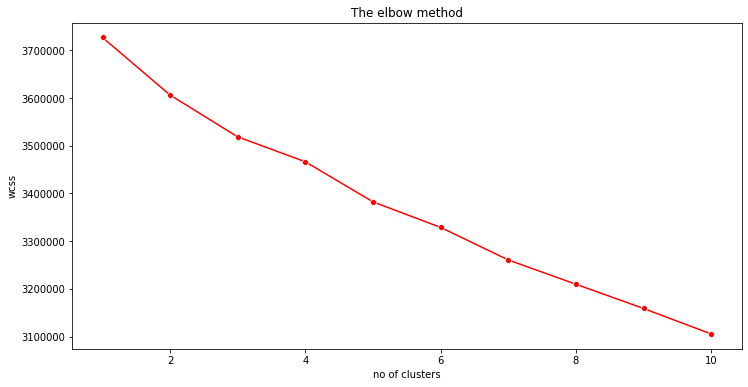

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(range(1,11),wcss,marker="o",color="red")
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
## From the above grapgh we can say K value is 7

In [102]:
kmeans=KMeans(n_clusters=7,init="k-means++",random_state=43)
y_means=kmeans.fit_predict(x)

In [103]:
y_means

array([6, 5, 5, ..., 2, 5, 1])